# Model Optimization and Data Visualization
## Hannah Miles-Kingrey

In [1]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
#loading db
sqlite_db_path = "../student_performance.db"
conn = sqlite3.connect(sqlite_db_path)

query_mat = "SELECT * FROM student_mat"
df_mat = pd.read_sql(query_mat, conn)

query_por = "SELECT * FROM student_por"
df_por = pd.read_sql(query_por, conn)

# combining the two in the db
df = pd.concat([df_mat, df_por], ignore_index=True)

conn.close()

In [3]:
print("Loaded Data Preview (Merged Student Data):")
display(df.head())

df = df.dropna(subset=['G3'])

Loaded Data Preview (Merged Student Data):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# encoding categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
# Normalizing numerical features for future reference (further optimization)

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
grade_cols = ['G1', 'G2', 'G3']
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in grade_cols]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## Optimization 1
### Logistic Regression accuracy 0.93
### Decision Tree accuracy  0.91

In [ ]:
# # Optimization 1
# # Feature Engineering 
# df['school_support'] = df['schoolsup']
# df['family_support'] = df['famsup']

# # Calculate average grade
# df['average_grade'] = (df['G1']+df['G2']+df['G3']) / 3

# # Create multi-class labels to fit the linear model
# def categorize_g3(grade):
#     if grade < 10:
#         return 0  # Low
#     elif 10 <= grade < 15:
#         return 1  # Medium
#     else:
#         return 2  # High

# # Create a new column that contains the corresponding category for each grade
# df['G3_category'] = df['G3'].apply(categorize_g3)

# # Defining features and target variable
# X = df.drop(columns=['G3', 'G3_category'])
# y = df['G3_category']

# # Spliting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

## Optimization 2
### Logistic Regression accuracy 0.93
### Decision Tree accuracy  0.91

In [ ]:
# Optimization 2
# Feature Engineering 
# for combined support
# df['famsup_schoolsup'] = df['famsup']*df['schoolsup']

# # Calculate average grade
# df['average_grade'] = (df['G1']+df['G2']+df['G3']) / 3

# # Create multi-class labels to fit the linear model
# def categorize_g3(grade):
#     if grade < 10:
#         return 0  # Low
#     elif 10 <= grade < 15:
#         return 1  # Medium
#     else:
#         return 2  # High

# # Create a new column that contains the corresponding category for each grade
# df['G3_category'] = df['G3'].apply(categorize_g3)

# # Defining features and target variable
# X = df.drop(columns=['G3', 'G3_category'])
# y = df['G3_category']

# # Spliting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# ) 

## Optimization 3
### Logistic Regression accuracy    0.93 
### Decision Tree accuracy  0.92

In [ ]:
# # Feature Engineering
# # Support count
# df['support_count'] = df['famsup'] + df['schoolsup'] + df['paid']

# # Calculate average grade
# df['average_grade'] = (df['G1']+df['G2']+df['G3']) / 3

# # Create multi-class labels to fit the linear model
# def categorize_g3(grade):
#     if grade < 10:
#         return 0  # Low
#     elif 10 <= grade < 15:
#         return 1  # Medium
#     else:
#         return 2  # High

# # Create a new column that contains the corresponding category for each grade
# df['G3_category'] = df['G3'].apply(categorize_g3)

# # Defining features and target variable
# X = df.drop(columns=['G3', 'G3_category'])
# y = df['G3_category']

# # Spliting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# ) 

## Optimization 4
### Logistic Regression accuracy    1.0 
### Decision Tree accuracy  1.0

In [8]:
# Optimization 4
# Feature Engineering
# Study Time and Paid Support (but these don't affect the accuracy)
df['study_paid_interaction'] = df['paid'] * df['studytime']
df['study_time_1'] = df['studytime'] < 2
df['study_time_2'] = (df['studytime'] > 2) & (df['studytime'] < 5)
df['study_time_3'] = (df['studytime'] > 5) & (df['studytime'] < 10)
df['study_time_4'] = df['studytime'] > 10 

# Calculate average grade
df['average_grade'] = (df['G1']+df['G2']+df['G3']) / 3

# Create multiclass labels to fit the linear model
def categorize_g3(grade):
    if grade < 10:
        return 0    # At risk
    elif 10 <= grade < 12:
        return 1    # Low risk
    elif 12 <= grade < 15:
        return 2    # Moderate risk
    else:
        return 3    # Not at risk

# Create a new column that contains the corresponding category for each grade
df['risk_category'] = df['G3'].apply(categorize_g3)

# Defining features and target variable
X = df.drop(columns=['risk_category'])
y = df['risk_category']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) 

In [9]:
# Baseline logistic regression model
log_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Model Evaluation:")
print("Accuracy:", log_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Model Evaluation:
Accuracy: 0.9904306220095693
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        41

    accuracy                           0.99       209
   macro avg       0.99      0.99      0.99       209
weighted avg       0.99      0.99      0.99       209

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        41

    accuracy                           0.99       209
   macro avg       0.99      0.99      0.99       209
weighted avg       0.99      0.99      0.99       209



c:\Users\hmk81\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# baseline multi-class Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Model Evaluation:")
print("Accuracy:", tree_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Model Evaluation:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        41

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        41

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



## Data Exploration and Visualization
### Is there a relationship between a student being at-risk and access to extra support (educational support, family educational support, or extra paid classes within the course subject)?
### Does a student's risk status change depending on their study time in combination with some form of support?

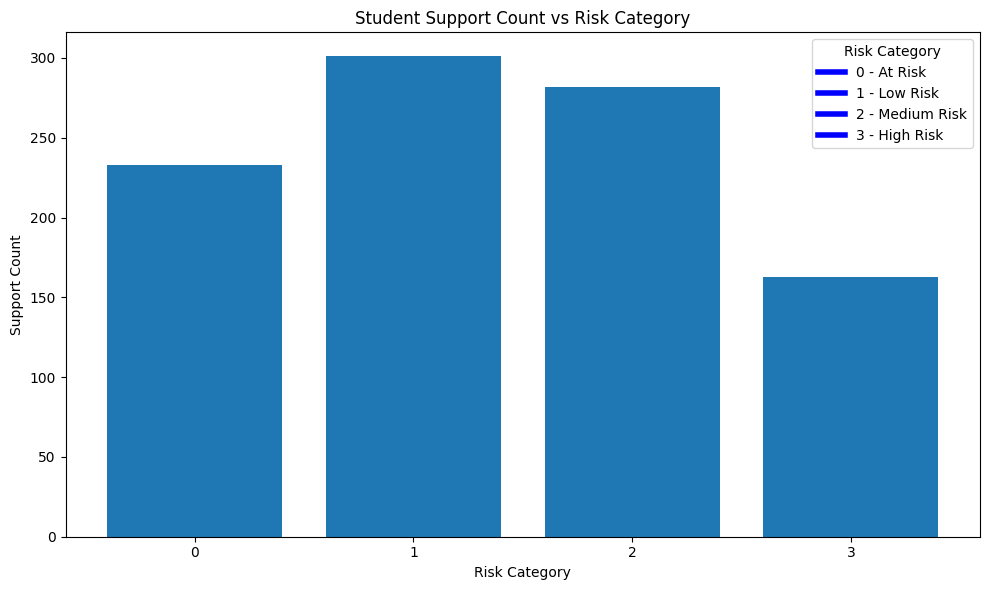

In [23]:
# Support Count vs Risk Category

# Count all forms of support
df['support_count'] = df['famsup'] + df['schoolsup'] + df['paid']

# Group by risk_category and sum the support_count
grouped_data = df.groupby('risk_category')['support_count'].sum().reset_index()

# Create chart
plt.figure(figsize=(10,6))
plt.bar(grouped_data['risk_category'], grouped_data['support_count'])

plt.title('Student Support Count vs Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Support Count')

# If risk_category is numeric, ensure only whole numbers are displayed
if grouped_data['risk_category'].dtype in ['int64', 'float64']:
    plt.xticks(ticks=grouped_data['risk_category'], labels=grouped_data['risk_category'].astype(int))

# Create custom handles for the legend

handles = [
    plt.Line2D([0], [0], color='blue', lw=4, label='0 - At Risk'),  
    plt.Line2D([0], [0], color='blue', lw=4, label='1 - Low Risk'),
    plt.Line2D([0], [0], color='blue', lw=4, label='2 - Medium Risk'),
    plt.Line2D([0], [0], color='blue', lw=4, label='3 - High Risk')
]

# Create a legend with custom labels only
plt.legend(handles=handles, title="Risk Category")
plt.tight_layout()
plt.show()